__**Table of Contents**__
====

>#### [11/2/2018](#1122018)
>#### [11/6/2018](#1162018)
>##### &emsp;[Zero-Point Calibration Function](#zeropoint)  Changes the zero point of DDO51 within a given fits and writes the data to another fits file
>##### &emsp;[Test graph of calibrated fits file](#testgraph)

<a id='1122018'></a>

11/2/2018
====

>### David has supplied with a new method removing dwarf stars using Gaia.  A cut can be made in the plot of excess astrometric noise and the photometric 'green' band (see below).  These are the cuts that can be made:
#### astrometric_excess_noise < 10^0.5 for G <= 19
##### astrometric_excess_noise < 10^(0.5 + 1.25/4*(G-19)) for G >= 19

<img src="files/aenstargal.png">

>### I will import the calibration data and make these cuts.

In [40]:
# Import libraries and modules
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import csvtofitsmod as cf
%matplotlib inline

cat = Table.read('C:\\Users\shebe\OneDrive\\School\\Graduate\\Research\\Nidever\\Data\\apogeegaia_giants.fits.gz')

In [13]:
#cf.csvtofits('C:\\Users\\shebe\\OneDrive\\School\\Graduate\\Research\\Nidever\\Data\\Temp\\1541185778895A.csv','C:\\Users\\shebe\\OneDrive\\School\\Graduate\\Research\\Nidever\\Data\\apogeegaia_giants_allgaia.fits.gz')

<a id='1162018'></a>

11/6/2018
====

>### I will put off making cuts temporarily.  David gave me three new fits files containing more DDO51 observations by Munn on three nights.  This data set has also been cross-matched with other surveys.  I need to first look for the dwarf locus ("swoosh") in a BP-RP vs. BP-DDO51 color-color plot.

In [32]:
# Import modules
from astropy.io import fits
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>


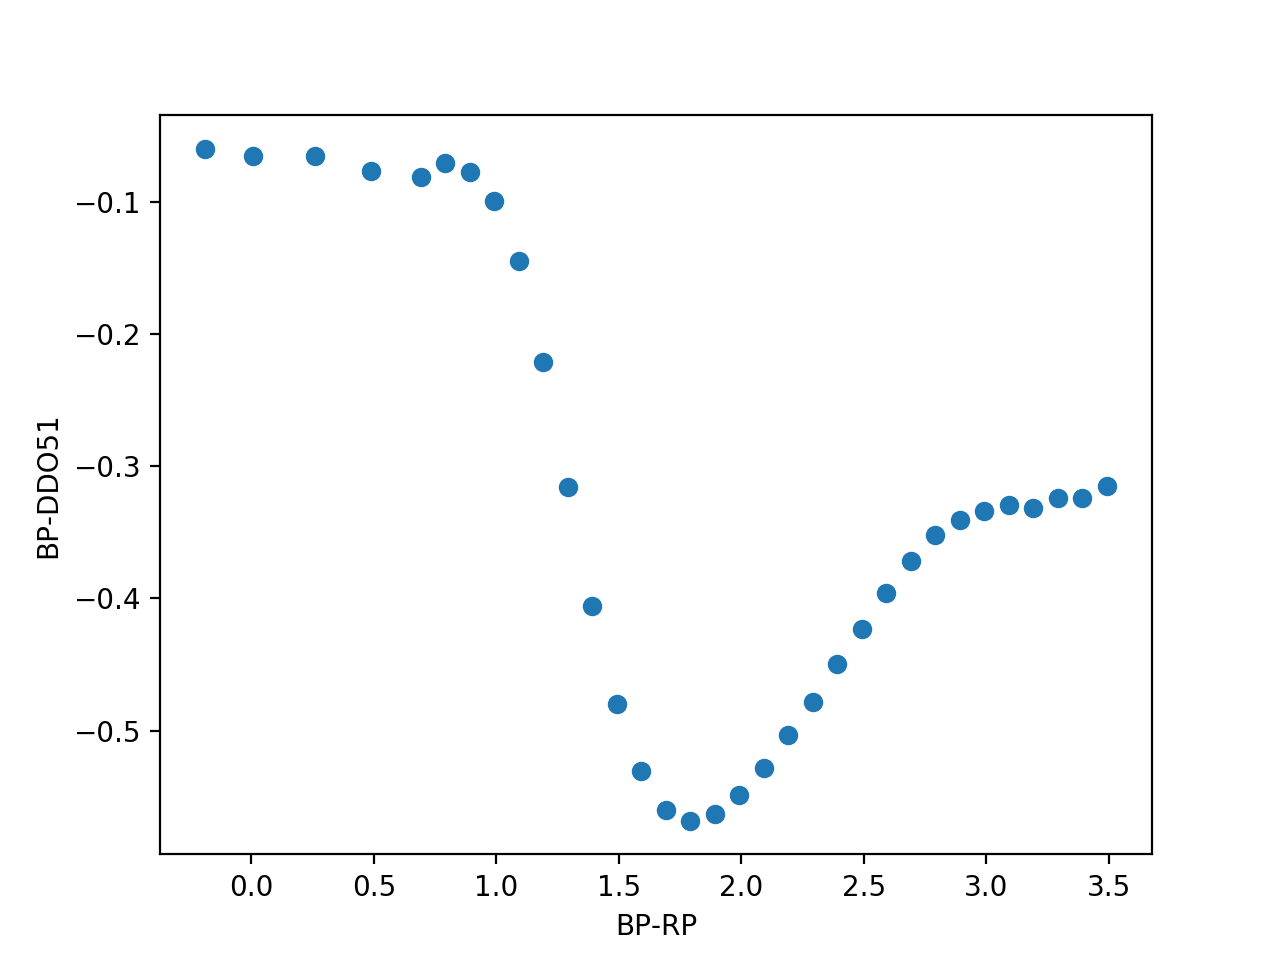

In [69]:
#David sent me what the dwarf swoosh should look like.  This is plotted below.
%matplotlib nbagg
dat = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\gaiad51_dwarflocus.fits')
plt.plot(dat['BPRP'],dat['BPD'],'o')
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')

plt.show()

In [75]:
#Loading data from night one
g12 = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn\g12d111_xmatch_all.fits.gz')

In [76]:
#Calculate differences between photometric bands
bprp = g12['GAIA_BP']-g12['GAIA_RP']
bpd = g12['GAIA_BP']-g12['DDO51']

#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
phot = np.zeros(len(g12), dtype=dt)
phot['bprp'] = bprp
phot['bpd'] = bpd

#Remove bad values (equal to zero or greater than 100)
good = np.where((phot['bprp']<100)&(phot['bpd']<100)&(phot['bprp']!=0)&(phot['bpd']!=0))
phot = phot[good]

C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':


<IPython.core.display.Javascript object>


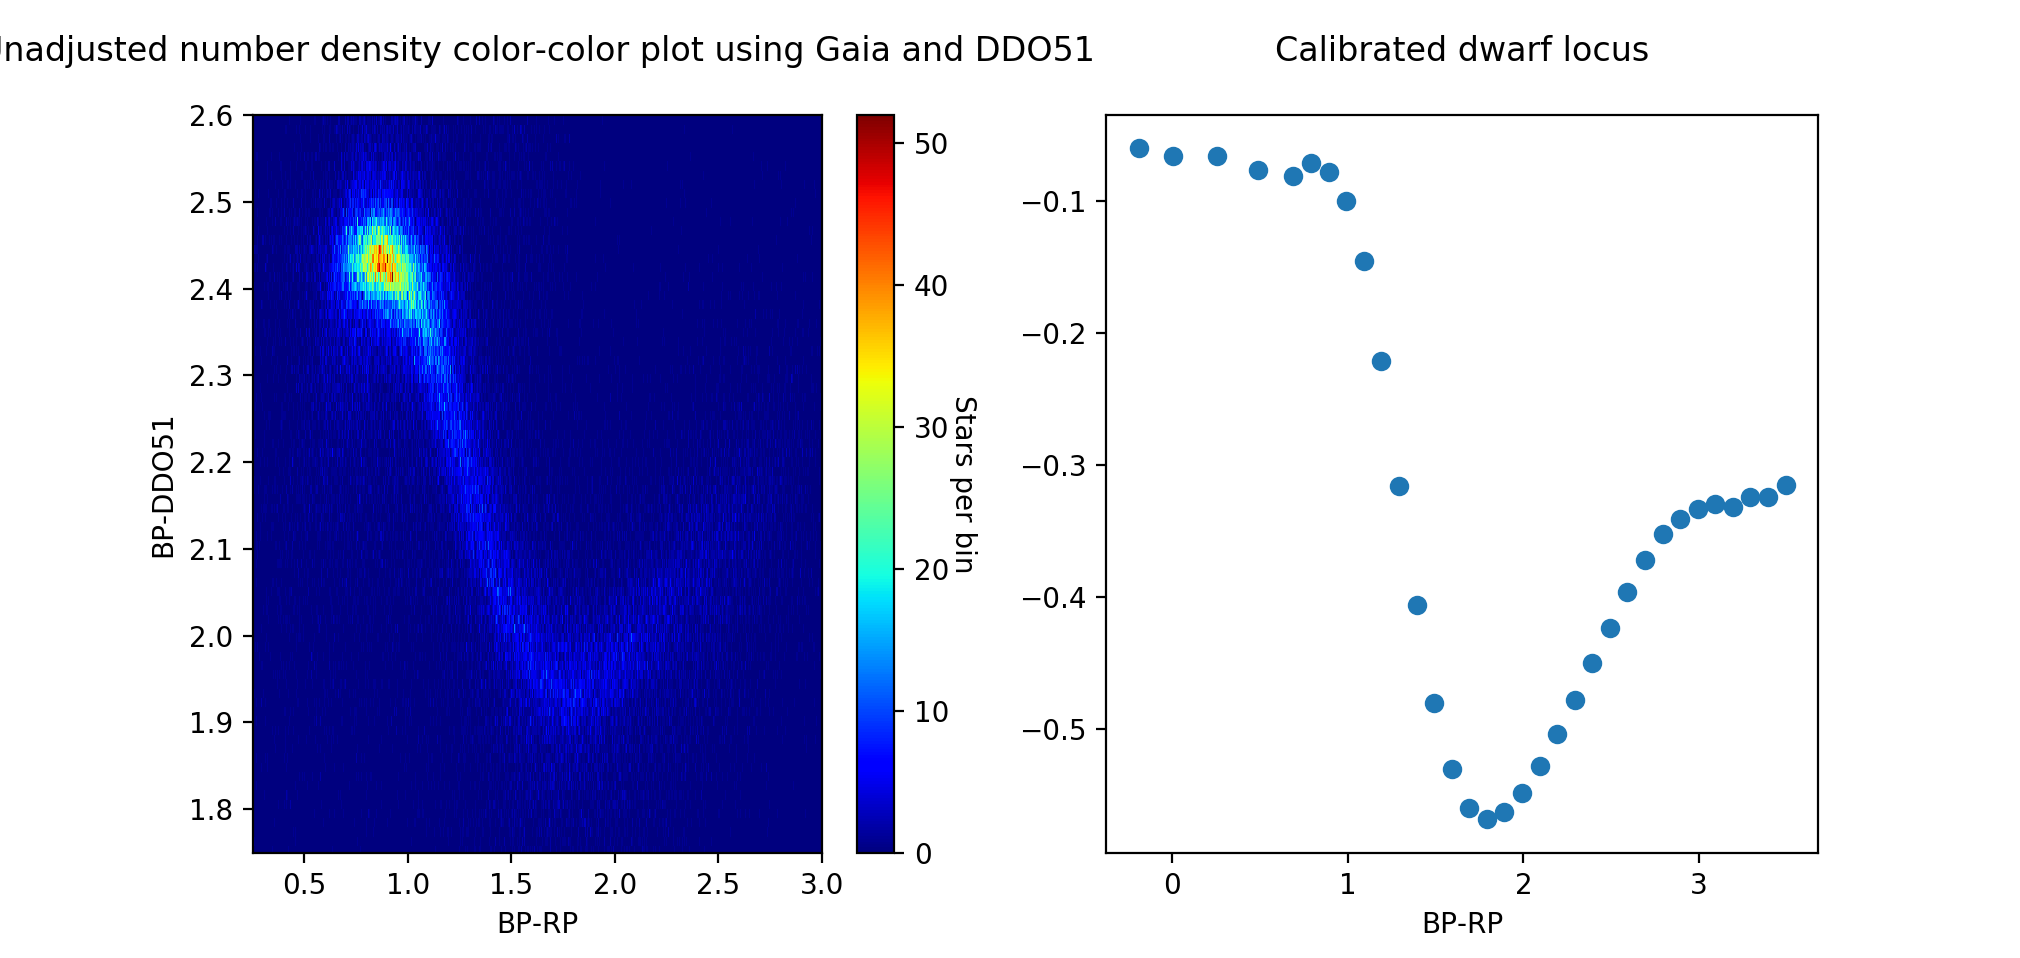

In [35]:
%matplotlib nbagg

x = phot['bprp']
y = phot['bpd']

plt.subplot(1, 2, 1)
plt.hist2d(x, y, (2000, 2000), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
plt.xlim(0.25,3)
plt.ylim(1.75,2.6)
plt.title('Unadjusted number density color-color plot using Gaia and DDO51', y=1.05)

plt.subplot(1, 2, 2)
plt.plot(dat['BPRP'],dat['BPD'],'o')
plt.xlabel('BP-RP')
plt.title('Calibrated dwarf locus', y=1.05)

plt.show()

In [36]:
print(max(dat['BPD'])-min(dat['BPD']))
2.5-1.9

0.508181


0.6000000000000001

In [37]:
#Adjusting DDO51 zero point
for i in range(len(phot['bpd'])):
    phot['bpd'][i] = phot['bpd'][i]  - 2.5

<IPython.core.display.Javascript object>


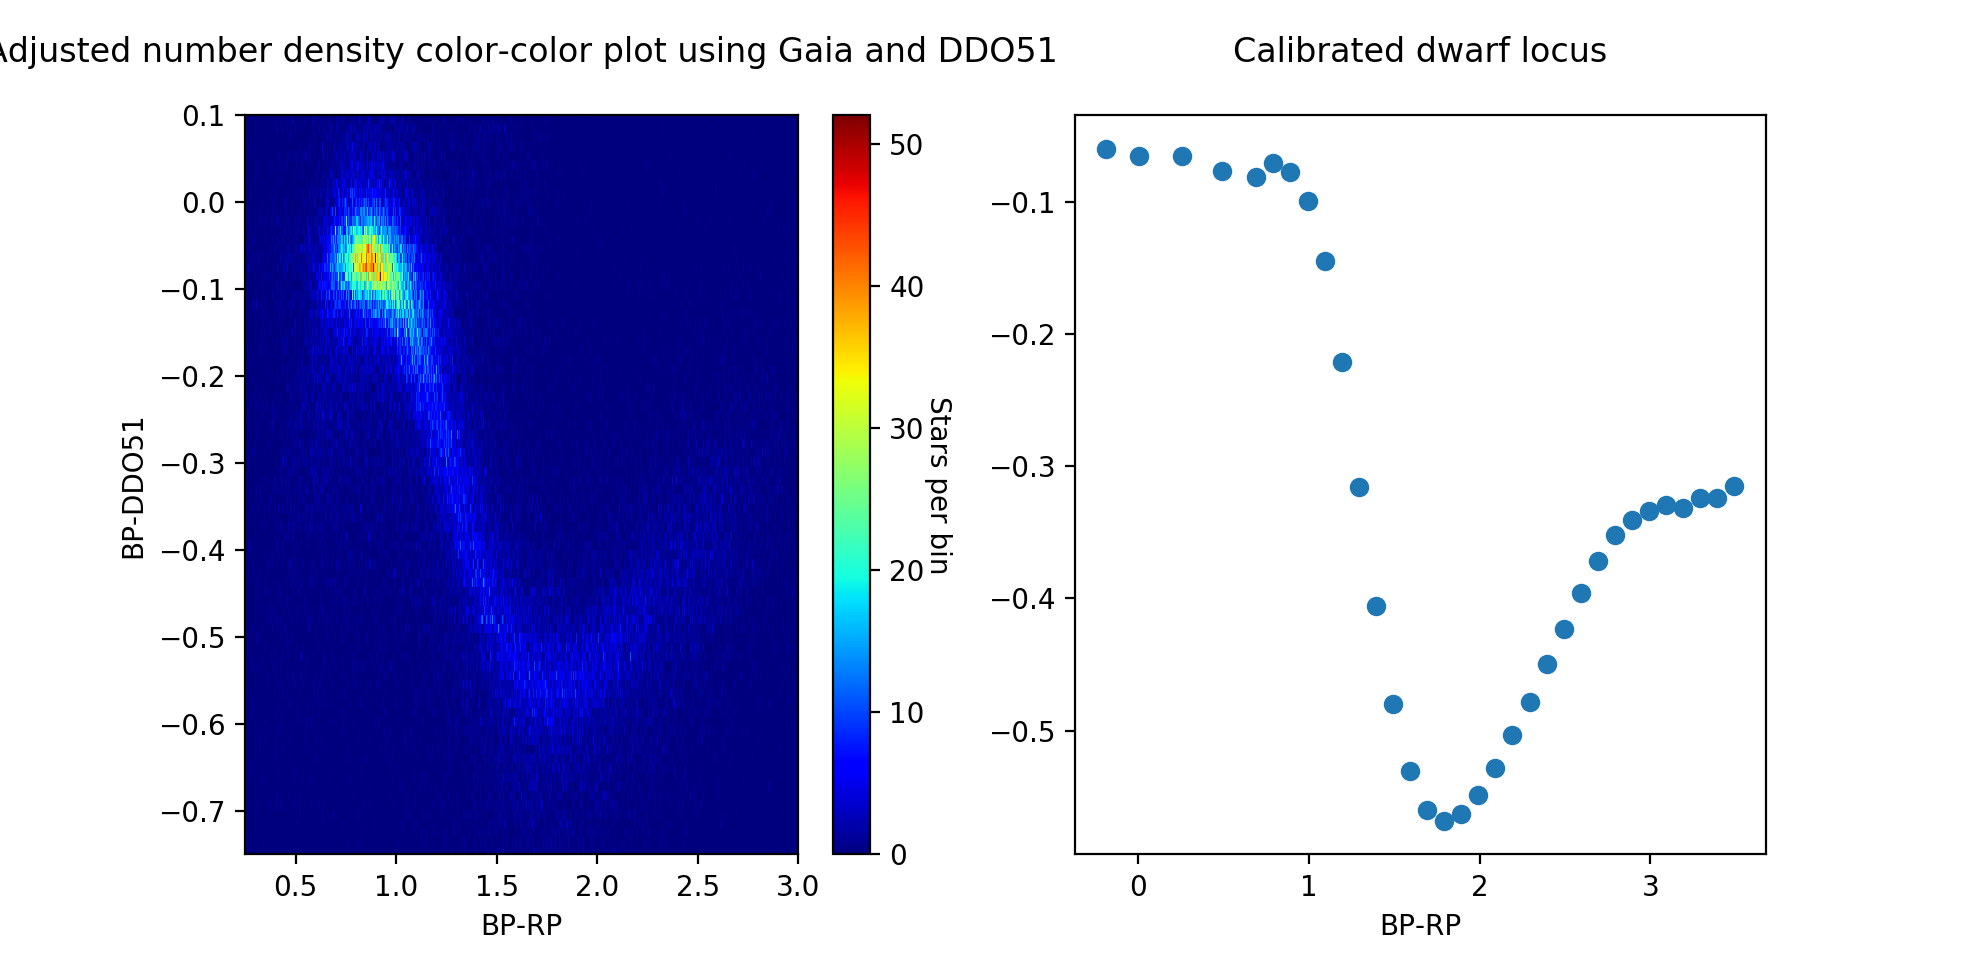

In [38]:
%matplotlib nbagg

x = phot['bprp']
y = phot['bpd']

plt.subplot(1, 2, 1)
plt.hist2d(x, y, (2000, 2000), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
plt.xlim(0.25,3)
plt.ylim(1.75-2.5,2.6-2.5)
plt.title('Adjusted number density color-color plot using Gaia and DDO51', y=1.05)

plt.subplot(1, 2, 2)
plt.plot(dat['BPRP'],dat['BPD'],'o')
plt.xlabel('BP-RP')
plt.title('Calibrated dwarf locus', y=1.05)

plt.show()

In [43]:
myList = [4, 1, 88, 44, 3]
myNumber = 0
min(myList, key=lambda x:abs(x-myNumber))

1

In [77]:
for i in range(len(phot['bpd'])):
    y = min(dat['BPRP'], key=lambda x:abs(x-phot['bprp'][i]))
    j = np.where(dat['BPRP']==y)
    phot['bpd'][i] = phot['bpd'][i]  - dat['BPD'][j]

In [80]:
#Calculate differences between photometric bands
bprp = g12['GAIA_BP']-g12['GAIA_RP']
bpd = g12['GAIA_BP']-g12['DDO51']

#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
zerop = np.zeros(len(g12), dtype=dt)
zerop['bprp'] = bprp
zerop['bpd'] = bpd

#Remove bad values (equal to zero or greater than 100)
good = np.where((zerop['bpd']<2.6)&(zerop['bpd']>1.7)&(zerop['bprp']<3)&(zerop['bprp']>0.4))
zerop = zerop[good]

C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in less
  if sys.path[0] == '':
C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in greater
  if sys.path[0] == '':


In [82]:
for i in range(len(zerop['bpd'])):
    y = min(dat['BPRP'], key=lambda x:abs(x-zerop['bprp'][i]))
    j = np.where(dat['BPRP']==y)
    zerop['bpd'][i] = zerop['bpd'][i]  - dat['BPD'][j]

<IPython.core.display.Javascript object>


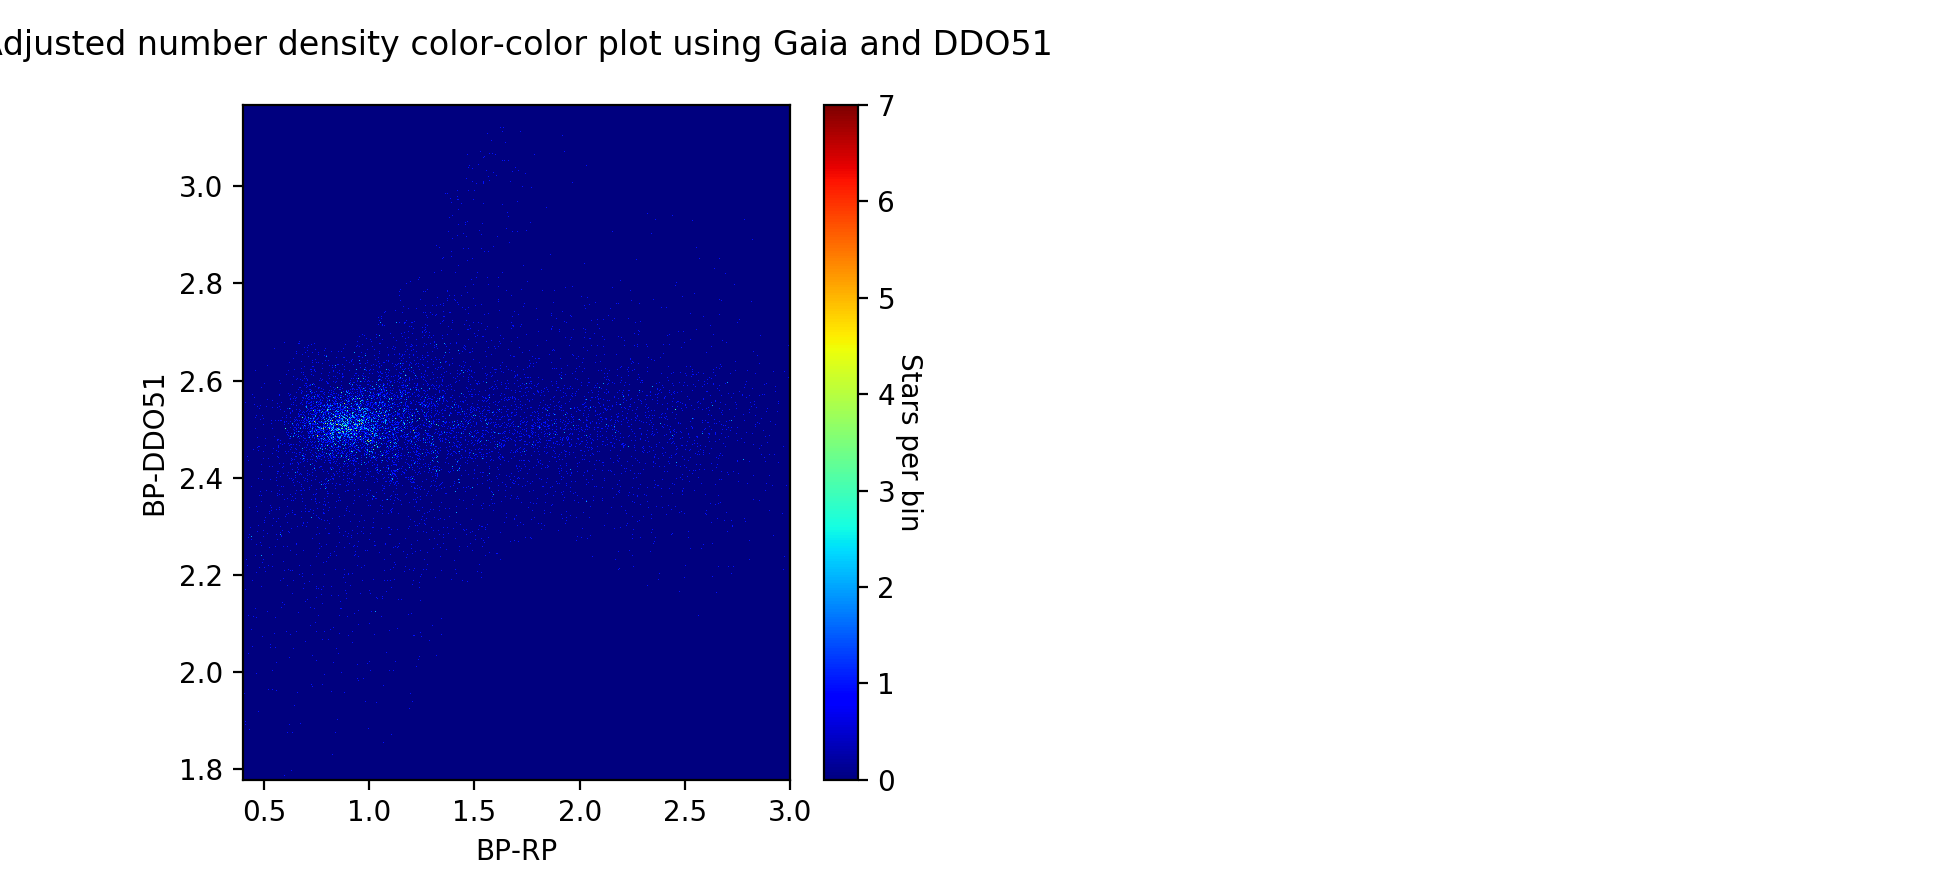

In [83]:
%matplotlib nbagg

x = zerop['bprp']
y = zerop['bpd']

plt.subplot(1, 2, 1)
plt.hist2d(x, y, (2000, 2000), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
plt.title('Adjusted number density color-color plot using Gaia and DDO51', y=1.05)

plt.show()

In [84]:
np.mean(zerop['bpd'])

2.501296232318444

<a id='zeropoint'></a>

In [124]:
# Putting all of the above together, I can automate the calibration of the zero-point of DDO51 as a function.

def calibr(cat,fin):
    # Import modules
    from astropy.io import fits
    from astropy.table import Table
    import numpy as np

    #Loading data from night one
    z = fits.open(cat)

    #Zero-point data
    #Calculate differences between photometric bands
    bprp = z[1].data['GAIA_BP']-z[1].data['GAIA_RP']
    bpd = z[1].data['GAIA_BP']-z[1].data['DDO51']

    #Create array with desired photometric data
    dt = np.dtype([('bprp',float),('bpd',float)])
    zerop = np.zeros(len(g12), dtype=dt)
    zerop['bprp'] = bprp
    zerop['bpd'] = bpd
    
    #Focus on values near the swoosh
    good = np.where((zerop['bpd']<2.6)&(zerop['bpd']>1.7)&(zerop['bprp']<3)&(zerop['bprp']>0.4))
    zerop = zerop[good]

    #Determine the mean difference between expected BP-DDO51 and the BP-DDO51 in the observation file
    for i in range(len(zerop['bpd'])):
        y = min(dat['BPRP'], key=lambda x:abs(x-zerop['bprp'][i]))
        j = np.where(dat['BPRP']==y)
        zerop['bpd'][i] = zerop['bpd'][i]  - dat['BPD'][j]
    m = np.mean(zerop['bpd'])
    
    #Adjusting DDO51 zero point
    for i in range(len(z[1].data['DDO51'])):
        z[1].data['DDO51'][i] = z[1].data['DDO51'][i] + m
    
    z.writeto(fin)

In [125]:
#Testing
calibr(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn\g12d111_xmatch_all.fits.gz',r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Test Data\testing.fits')

C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in less
C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in greater


In [126]:
test = Table.read(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Test Data\testing.fits')

C:\Users\shebe\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in less
  


<IPython.core.display.Javascript object>


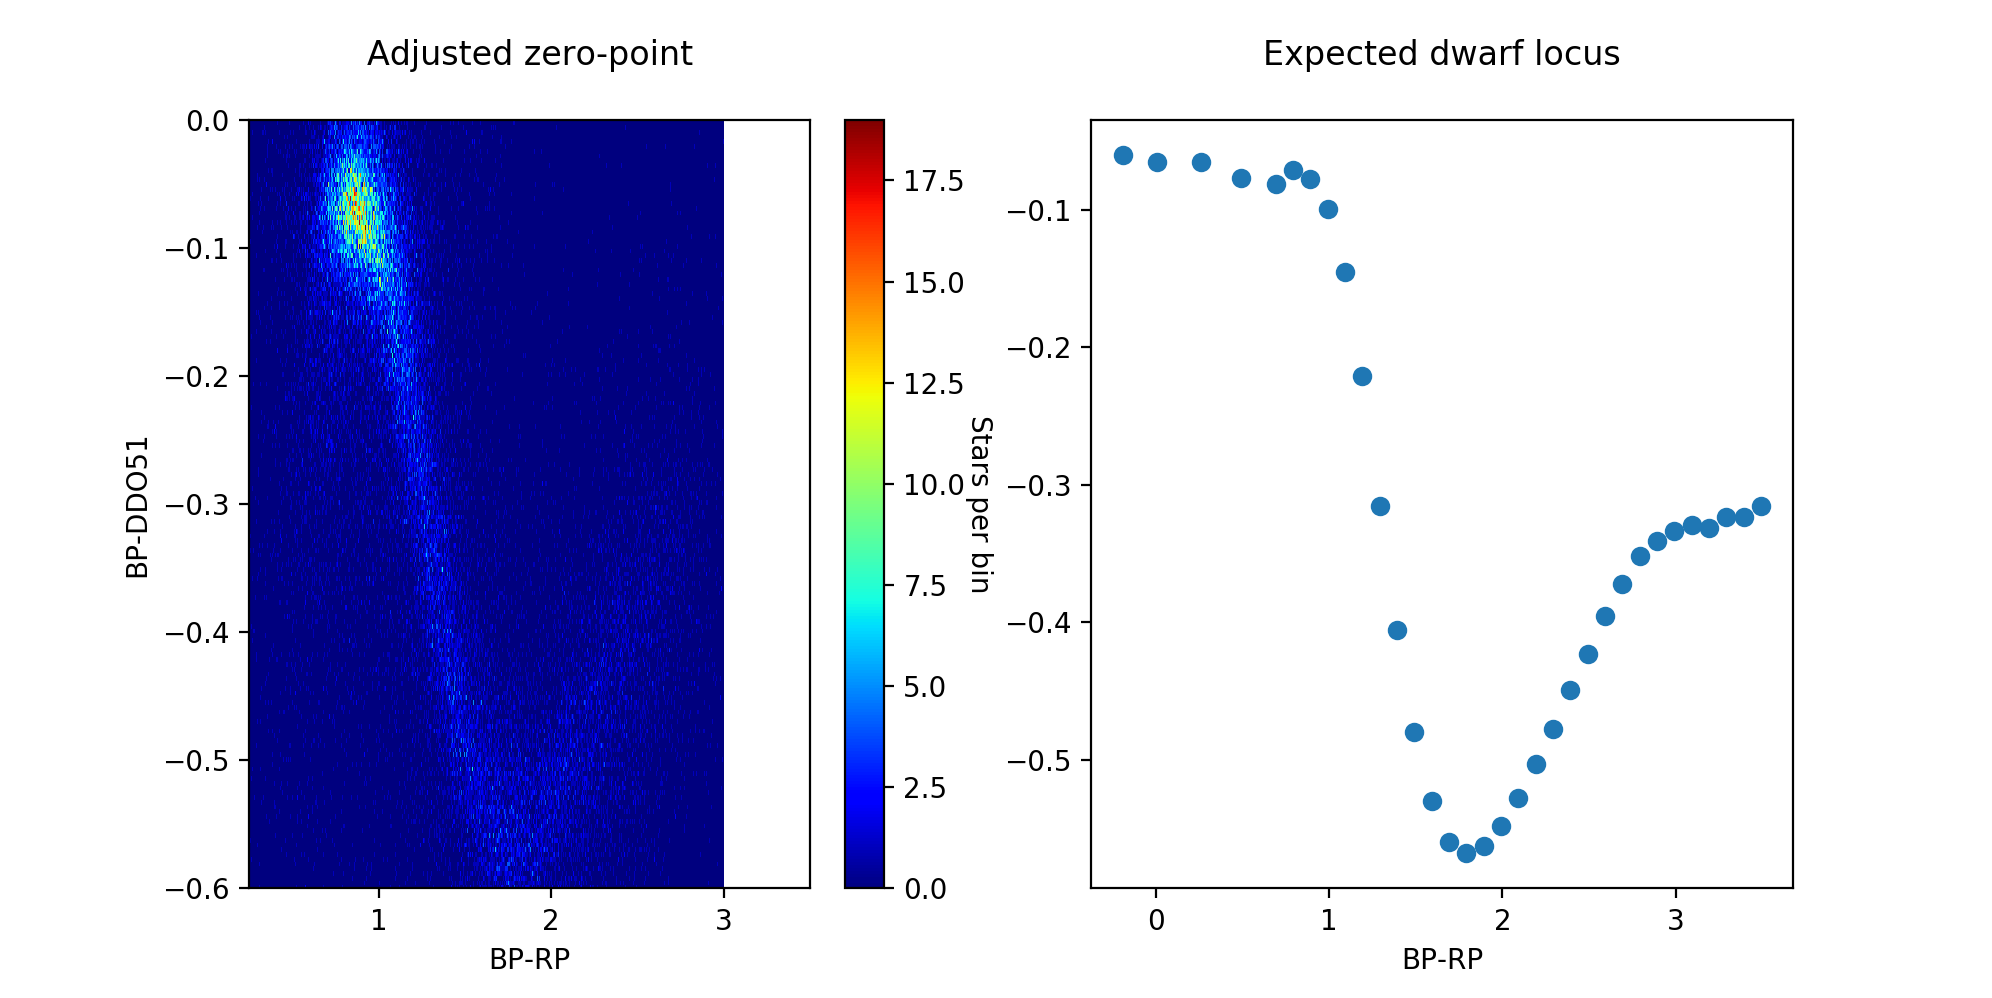

In [131]:
%matplotlib nbagg

#Calculate differences between photometric bands
bprp = test['GAIA_BP']-test['GAIA_RP']
bpd = test['GAIA_BP']-test['DDO51']

#Create array with desired photometric data
dt = np.dtype([('bprp',float),('bpd',float)])
phot = np.zeros(len(g12), dtype=dt)
phot['bprp'] = bprp
phot['bpd'] = bpd

#Remove bad values (equal to zero or greater than 100)
good = np.where((phot['bprp']<3)&(phot['bpd']<5)&(phot['bprp']!=0)&(phot['bpd']!=0))
phot = phot[good]

x = phot['bprp']
y = phot['bpd']

plt.subplot(1, 2, 1)
plt.hist2d(x, y, (2000, 2000), cmap=plt.cm.jet)
cbar = plt.colorbar()
cbar.set_label('Stars per bin', rotation=270, labelpad=10)
plt.xlabel('BP-RP')
plt.ylabel('BP-DDO51')
plt.xlim(0.25,3.5)
plt.ylim(-0.6,0)
plt.title('Adjusted zero-point', y=1.05)

plt.subplot(1, 2, 2)
plt.plot(dat['BPRP'],dat['BPD'],'o')
plt.xlabel('BP-RP')
plt.title('Expected dwarf locus', y=1.05)

plt.show()

<a id='testgraph'></a>

>### Above I demonstrate that my new function can calibrate the DDO51 photometry as desired and generate a new fits file.